In [1]:
!pip install mlxtend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import networkx as nx
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
labels_params = {'font_family': 'TH Sarabun New', 'alpha':.8, 'font_size':12}
mpl.rc('font', family='TH Sarabun New',size = 7)

In [2]:
filename = 'Customer-Preference-Survey-Responses-Form-Responses-1.csv'
df = pd.read_csv(filename)
print(df.shape)
df.head(10)

(29, 28)


,Timestamp,โปรแกรมแท้,เครื่องซักผ้า,NONE,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
0,10/28/2021 14:05:59,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,10/28/2021 14:06:18,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
2,10/28/2021 14:06:20,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/28/2021 14:06:21,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
4,10/28/2021 14:06:23,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
5,10/28/2021 14:06:29,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
6,10/28/2021 14:06:32,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
7,10/28/2021 14:06:38,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
8,10/28/2021 14:06:49,NaN,NaN,ไม่เคย,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
9,10/28/2021 14:06:56,ไม่เคยซื้อ,ตัวเลือก 1,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [3]:
prep = df.reset_index(drop=True).rename_axis('student').drop(columns=['Timestamp','NONE']).replace({np.nan : 0 ,"ไม่เคย" :"ไม่เคยซื้อ","เคย" : "เคยซื้อ","ตัวเลือก 1":"เคยซื้อ"}).copy()
prep.head()

,โปรแกรมแท้,เครื่องซักผ้า,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
student,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,0,0,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
2,0,0,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,0,0,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
4,0,0,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [4]:
prep.melt()['value'].value_counts(dropna=False)

ไม่เคยซื้อ    456
เคยซื้อ       269
0              29
Name: value, dtype: int64

In [5]:
prep.replace({'เคยซื้อ': 1, 'ไม่เคยซื้อ': 0}, inplace=True)
prep.head()

,โปรแกรมแท้,เครื่องซักผ้า,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
student,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
1,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
2,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0
4,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0


In [6]:
prep.to_csv('prep_customer_pref.csv')

# Load dataset

In [7]:
df = pd.read_csv('prep_customer_pref.csv', index_col=0)
print(df.shape)
df.head()

(29, 26)


,โปรแกรมแท้,เครื่องซักผ้า,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
student,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
1,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
2,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0
4,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0


#EDA

In [8]:
df.describe().T.sort_values('mean', ascending=False).to_csv('describe.csv')
df.describe().T.sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
รองเท้าวิ่ง,29.0,0.965517,0.185695,0.0,1.0,1.0,1.0,1.0
คอร์สเรียนเสริม,29.0,0.931034,0.257881,0.0,1.0,1.0,1.0,1.0
เคส ipad,29.0,0.896552,0.309934,0.0,1.0,1.0,1.0,1.0
"หูฟัง bluetooth (airpods,truewireless)",29.0,0.758621,0.435494,0.0,1.0,1.0,1.0,1.0
Ebook,29.0,0.655172,0.483725,0.0,0.0,1.0,1.0,1.0
เครื่องดนตรี,29.0,0.551724,0.506120,0.0,0.0,1.0,1.0,1.0
เบาะรองนั่ง,29.0,0.551724,0.506120,0.0,0.0,1.0,1.0,1.0
BTC (Bitcoin),29.0,0.448276,0.506120,0.0,0.0,0.0,1.0,1.0
ตู้เย็น,29.0,0.413793,0.501230,0.0,0.0,0.0,1.0,1.0
โปรแกรมแท้,29.0,0.379310,0.493804,0.0,0.0,0.0,1.0,1.0


#Purchase/Usage Ranking

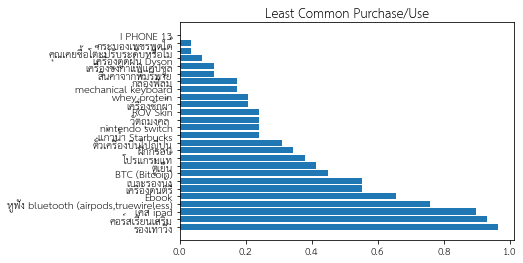

In [9]:
data =pd.read_csv('describe.csv')
name = np.array(data.iloc[0:28,0])
mean = np.array(data.iloc[0:28,2])
plt.title('Least Common Purchase/Use')
plt.barh(name, mean)
plt.show()

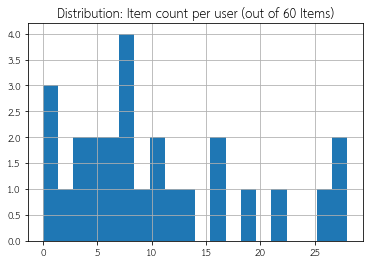

In [10]:
df.sum().hist(bins=20)
plt.title('Distribution: Item count per user (out of 60 Items)')
plt.show()

# Market Basket Analysis

In [11]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
df = df.applymap(encode_units)

In [12]:
frequent_itemsets = apriori(df, min_support=0.04, use_colnames=True)

In [13]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(โปรแกรมแท้),(เครื่องซักผ้า),0.379310,0.206897,0.103448,0.272727,1.318182,0.024970,1.090517
1,(เครื่องซักผ้า),(โปรแกรมแท้),0.206897,0.379310,0.103448,0.500000,1.318182,0.024970,1.241379
2,(โปรแกรมแท้),(ผักกรอบ),0.379310,0.344828,0.137931,0.363636,1.054545,0.007134,1.029557
3,(ผักกรอบ),(โปรแกรมแท้),0.344828,0.379310,0.137931,0.400000,1.054545,0.007134,1.034483
4,(คอร์สเรียนเสริม),(โปรแกรมแท้),0.931034,0.379310,0.379310,0.407407,1.074074,0.026159,1.047414
5,(โปรแกรมแท้),(คอร์สเรียนเสริม),0.379310,0.931034,0.379310,1.000000,1.074074,0.026159,inf
6,(nintendo switch),(โปรแกรมแท้),0.241379,0.379310,0.103448,0.428571,1.129870,0.011891,1.086207
7,(โปรแกรมแท้),(nintendo switch),0.379310,0.241379,0.103448,0.272727,1.129870,0.011891,1.043103
8,(mechanical keyboard),(โปรแกรมแท้),0.172414,0.379310,0.103448,0.600000,1.581818,0.038050,1.551724
9,(โปรแกรมแท้),(mechanical keyboard),0.379310,0.172414,0.103448,0.272727,1.581818,0.038050,1.137931


In [14]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(เครื่องซักผ้า),(โปรแกรมแท้),0.206897,0.379310,0.103448,0.500000,1.318182,0.024970,1.241379
5,(โปรแกรมแท้),(คอร์สเรียนเสริม),0.379310,0.931034,0.379310,1.000000,1.074074,0.026159,inf
8,(mechanical keyboard),(โปรแกรมแท้),0.172414,0.379310,0.103448,0.600000,1.581818,0.038050,1.551724
11,(โปรแกรมแท้),(เคส ipad),0.379310,0.896552,0.344828,0.909091,1.013986,0.004756,1.137931
12,(เครื่องชงกาแฟแคปซูล),(โปรแกรมแท้),0.103448,0.379310,0.068966,0.666667,1.757576,0.029727,1.862069
...,...,...,...,...,...,...,...,...,...
954029,"(whey protein, ตั๋วเครื่องบินไปญี่ปุ่น)","(mechanical keyboard, เครื่องดนตรี, เบาะรองนั่...",0.103448,0.068966,0.068966,0.666667,9.666667,0.061831,2.793103
954030,"(ตั๋วเครื่องบินไปญี่ปุ่น, ตู้เย็น)","(mechanical keyboard, เครื่องดนตรี, เบาะรองนั่...",0.137931,0.068966,0.068966,0.500000,7.250000,0.059453,1.862069
954038,"(whey protein, ผักกรอบ)","(mechanical keyboard, เครื่องดนตรี, เบาะรองนั่...",0.137931,0.068966,0.068966,0.500000,7.250000,0.059453,1.862069
954039,"(ตู้เย็น, ผักกรอบ)","(mechanical keyboard, เครื่องดนตรี, เบาะรองนั่...",0.137931,0.068966,0.068966,0.500000,7.250000,0.059453,1.862069


In [15]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
print(frequent_itemsets.shape)
frequent_itemsets.head()

(37, 2)


,support,itemsets
0,0.965517,(รองเท้าวิ่ง)
1,0.931034,(คอร์สเรียนเสริม)
2,0.896552,(เคส ipad)
3,0.758621,"(หูฟัง bluetooth (airpods,truewireless))"
4,0.551724,(เบาะรองนั่ง)


In [16]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
print(rules.shape)
rules.sort_values('lift',ascending=False).head(15)

(108, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
55,"(เคส ipad, คอร์สเรียนเสริม)",(เบาะรองนั่ง),0.827586,0.551724,0.551724,0.666667,1.208333,0.095125,1.344828
86,"(รองเท้าวิ่ง, เบาะรองนั่ง)","(เคส ipad, คอร์สเรียนเสริม)",0.517241,0.827586,0.517241,1.000000,1.208333,0.089180,inf
58,(เบาะรองนั่ง),"(เคส ipad, คอร์สเรียนเสริม)",0.551724,0.827586,0.551724,1.000000,1.208333,0.095125,inf
89,"(เคส ipad, คอร์สเรียนเสริม)","(รองเท้าวิ่ง, เบาะรองนั่ง)",0.827586,0.517241,0.517241,0.625000,1.208333,0.089180,1.287356
92,(เบาะรองนั่ง),"(รองเท้าวิ่ง, เคส ipad, คอร์สเรียนเสริม)",0.551724,0.793103,0.517241,0.937500,1.182065,0.079667,3.310345
83,"(รองเท้าวิ่ง, เคส ipad, คอร์สเรียนเสริม)",(เบาะรองนั่ง),0.793103,0.551724,0.517241,0.652174,1.182065,0.079667,1.288793
71,(เครื่องดนตรี),"(เคส ipad, คอร์สเรียนเสริม)",0.551724,0.827586,0.517241,0.937500,1.132813,0.060642,2.758621
66,"(เคส ipad, คอร์สเรียนเสริม)",(เครื่องดนตรี),0.827586,0.551724,0.517241,0.625000,1.132812,0.060642,1.195402
106,(Ebook),"(รองเท้าวิ่ง, เคส ipad, คอร์สเรียนเสริม)",0.655172,0.793103,0.586207,0.894737,1.128146,0.066587,1.965517
95,"(รองเท้าวิ่ง, เคส ipad, คอร์สเรียนเสริม)",(Ebook),0.793103,0.655172,0.586207,0.739130,1.128146,0.066587,1.321839


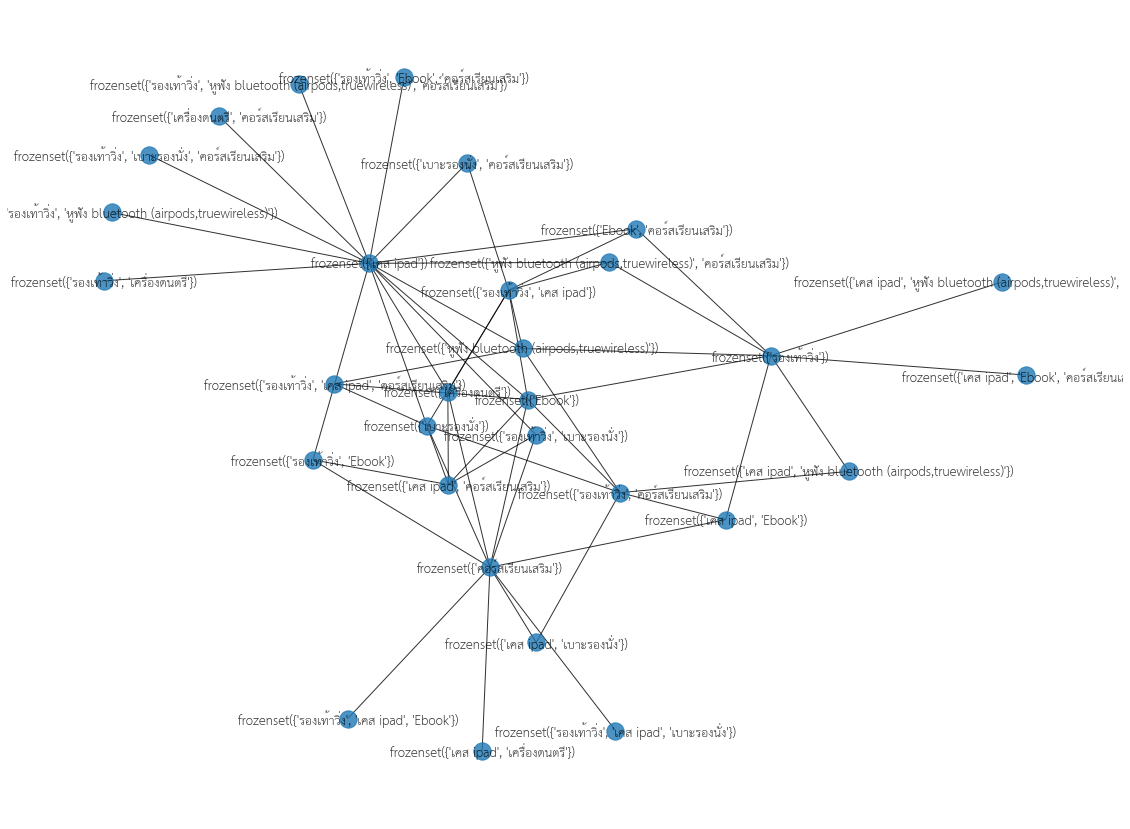

In [17]:
fig, ax=plt.subplots(figsize=(20,15))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')

nx.draw(GA,with_labels=True, **labels_params)
plt.show()

In [18]:
item_item_matrix = pd.DataFrame(index=df.columns,columns=df.columns)

In [19]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(df.iloc[:,i],df.iloc[:,j])

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [20]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [21]:
links_filtered=links.loc[ (links['value'] > 0.1) & 
                         (links['item'] != links['related item']) ]
item = links_filtered['item']
relate = links_filtered['related item']
sim = links_filtered['value']
links_filtered

,item,related item,value
1,โปรแกรมแท้,เครื่องซักผ้า,0.369274
2,โปรแกรมแท้,รองเท้าวิ่ง,0.569803
3,โปรแกรมแท้,ผักกรอบ,0.381385
4,โปรแกรมแท้,คอร์สเรียนเสริม,0.638285
5,โปรแกรมแท้,nintendo switch,0.341882
...,...,...,...
619,ROV Skin,กล้องฟิล์ม,0.507093
620,ROV Skin,เครื่องดนตรี,0.377964
621,ROV Skin,whey protein,0.46291
622,ROV Skin,วัตถุมงคล,0.285714


In [22]:
sim_threshold = 0.65
sim_df = links_filtered[links_filtered.apply(lambda x: x['item']!=x['related item'], axis=1) & links_filtered['value'].between(sim_threshold, 1)]
sim_df.sort_values('value', ascending=False)

,item,related item,value
54,รองเท้าวิ่ง,คอร์สเรียนเสริม,0.945611
102,คอร์สเรียนเสริม,รองเท้าวิ่ง,0.945611
227,เคส ipad,รองเท้าวิ่ง,0.926562
59,รองเท้าวิ่ง,เคส ipad,0.926562
109,คอร์สเรียนเสริม,เคส ipad,0.905822
229,เคส ipad,คอร์สเรียนเสริม,0.905822
62,รองเท้าวิ่ง,"หูฟัง bluetooth (airpods,truewireless)",0.886405
302,"หูฟัง bluetooth (airpods,truewireless)",รองเท้าวิ่ง,0.886405
309,"หูฟัง bluetooth (airpods,truewireless)",เคส ipad,0.836242
237,เคส ipad,"หูฟัง bluetooth (airpods,truewireless)",0.836242


Graph with 13 nodes and 23 edges


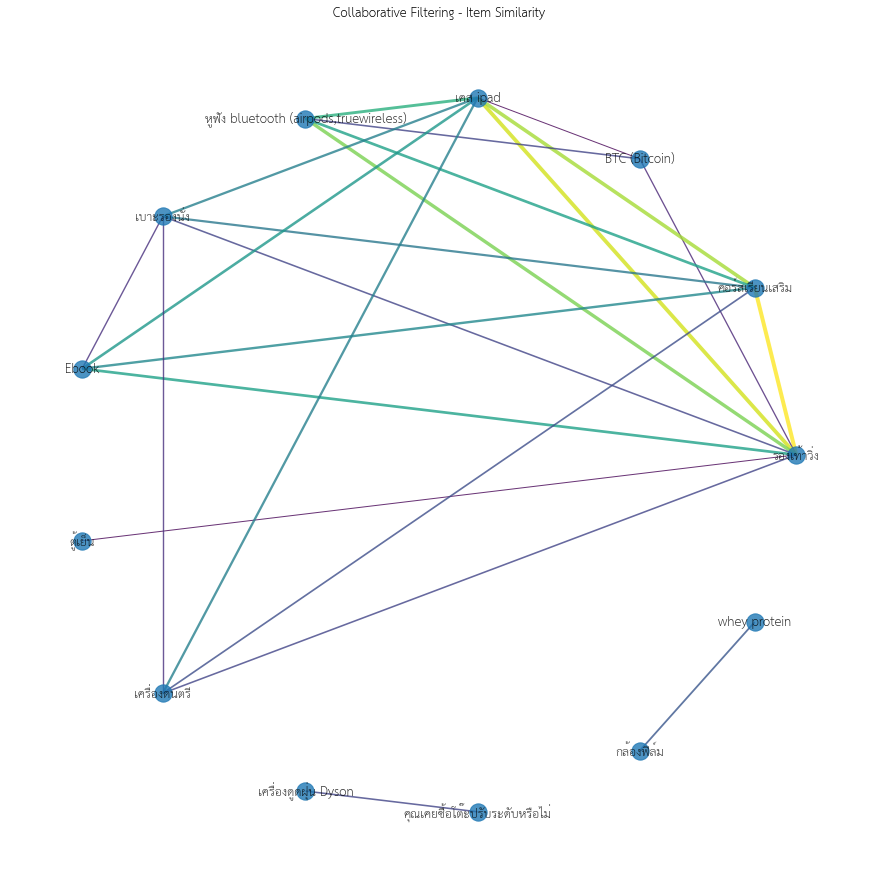

In [23]:
G = nx.Graph()
G.add_weighted_edges_from([ (x['item'],x['related item'], round(x['value'],2)) for i,x in sim_df.iterrows()])
print(nx.info(G))
labels_params = {'font_family': 'TH Sarabun New', 'alpha':.8, 'font_size':12}

edgelist, weights = zip(*[((u,v), d['weight'])for u,v,d in G.edges(data=True)])
width = 1 + ((np.array(weights) - min(weights)) / (max(weights) - min(weights)))*3

plt.figure(figsize=(12,12))
pos = nx.circular_layout(G, scale=5)
nx.draw(G, pos, with_labels=True,edgelist=edgelist, width=width, 
        edge_color=weights,**labels_params)
plt.title('Collaborative Filtering - Item Similarity')
plt.show()